# Classification_Gas Component
#### 2024.7.1
#### Chulwon Chae

### Purpose of Data Analysis
- Detect gas sensor values to predict the type of resulting mixed gas.
- Use the mixed gas type prediction model for anomaly detection to ensure proper gas mixture.

In [4]:
import pandas as pd

df = pd.read_csv('/Users/chulwonchae/MachineLearning_study_summer/data/3.Classification_Gas_component/gascomponent.csv')

In [2]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

#library for sampling 
from imblearn.under_sampling    import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE

#library for statistic
from scipy import stats

#library for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


## 1. Data Processing 1 

### 1-1 Data Load 

In [3]:
random_state = 1234

In [5]:
df.head()

1         2          3          4           5          6  \
0  245051.3867  6.416474  65.366640  88.319524  105.418091 -46.358192   
1   59676.9531  2.320079  11.940337  15.342921   21.212215  -9.826378   
2  244500.1953  6.408445  65.394235  88.604260  107.358495 -46.173043   
3  245405.2031  6.396332  65.324828  88.468697  108.123802 -46.070771   
4  245932.9141  6.418066  65.346245  88.820655  103.805399 -46.497829   

           7           8            9        10  ...         120         121  \
0 -68.175038 -306.481949  223313.7812  5.300864  ... -120.459018  56932.6113   
1 -13.907139  -39.679449   57923.5781  2.159965  ...   -5.188364   8383.0586   
2 -71.623668 -321.496925  222101.5703  5.286261  ...  -44.112924  56897.7060   
3 -71.186544 -303.240500  223263.8125  5.295768  ...  -50.689482  57682.1289   
4 -68.056935 -288.563157  224945.7031  5.323965  ...  -45.836839  56406.2792   

        122        123        124        125        126        127        128  \
0  6.913148  15.540243  19.320850  24.259156 -15.373858 -30.961903 -39.008691   
1  2.004270   1.575809   2.202270   3.255159  -1.401549  -2.005170  -3.993584   
2  6.870780  15.636151  19.566961  26.142821 -15.306133 -24.256546 -44.792395   
3  6.923879  15.697709  19.822191  26.007811 -15.592852 -24.941506 -42.894842   
4  6.895612  15.520323  19.683290  25.876848 -15.184254 -24.434748 -39.145385   

   Gas  
0    5  
1    5  
2    5  
3    5  
4    5  

[5 rows x 129 columns]

### 1-2 Duplicated Data

In [8]:
len(df[df.duplicated()])

0

### 1-3 Missing Values

In [10]:
null_count = df.isnull().sum()
null_count

1      0
2      0
3      0
4      0
5      0
      ..
125    0
126    0
127    0
128    0
Gas    0
Length: 129, dtype: int64

In [11]:
df.columns[null_count != 0]

Index([], dtype='object')

## 2. Data EDA

### 2-1 Data Type and Summary

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21802 entries, 0 to 21801
Columns: 129 entries, 1 to Gas
dtypes: float64(128), int64(1)
memory usage: 21.5 MB


In [14]:
# categorical vs numerical
for column_name in list(df.columns):
    print(df[column_name].unique())    
# Only target column is a categorical column

[2.45051387e+05 5.96769531e+04 2.44500195e+05 ... 3.63137500e+03
 1.74116700e+02 2.34867910e+04]
[6.416474 2.320079 6.408445 ... 1.886648 1.045112 3.503305]
[65.36664  11.940337 65.394235 ...  0.853495  0.111434  7.901476]
[88.319524 15.342921 88.60426  ...  1.324024  0.42538  14.400651]
[105.418091  21.212215 107.358495 ...   4.377756   3.408624  20.282   ]
[-46.358192  -9.826378 -46.173043 ...  -0.694729  -0.130351  -4.463151]
[-68.175038 -13.907139 -71.623668 ...  -1.200825  -0.415933  -6.715008]
[-306.481949  -39.679449 -321.496925 ...   -5.069705   -3.159319
  -19.461249]
[223313.7812  57923.5781 222101.5703 ...  40195.0977   6273.5605
  24106.2109]
[5.300864 2.159965 5.286261 ... 2.467485 1.241807 3.335383]
[61.213985 11.858598 60.93741  ... 13.358106  3.189025  8.650107]
[87.179661 15.872076 87.080338 ... 22.514573  7.056314 15.967876]
[101.533315  22.974961 104.481577 ...  38.619119  20.734318  24.024552]
[-41.613435  -9.474643 -41.217737 ...  -8.395893  -2.318988  -4.709225]
[

In [19]:
df.dtypes

1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
125    float64
126    float64
127    float64
128    float64
Gas      int64
Length: 129, dtype: object

In [21]:
list_numerica_columns = list(df.select_dtypes(include=['float64']).columns)
target_columns = 'Gas'

In [22]:
print(len(list_numerica_columns))

128


In [23]:
len(df)

21802

#### Summary of Data
#### Number of variables : 129
    numeric variables : 128
    categorical varabiels : 1 (target column)
#### Number of observations : 21802
#### Missing Cells : 0
#### Duplicated Cells : 0


### 2-2 Depenedent Varaible Data Explore

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Percent(ratio) by label')

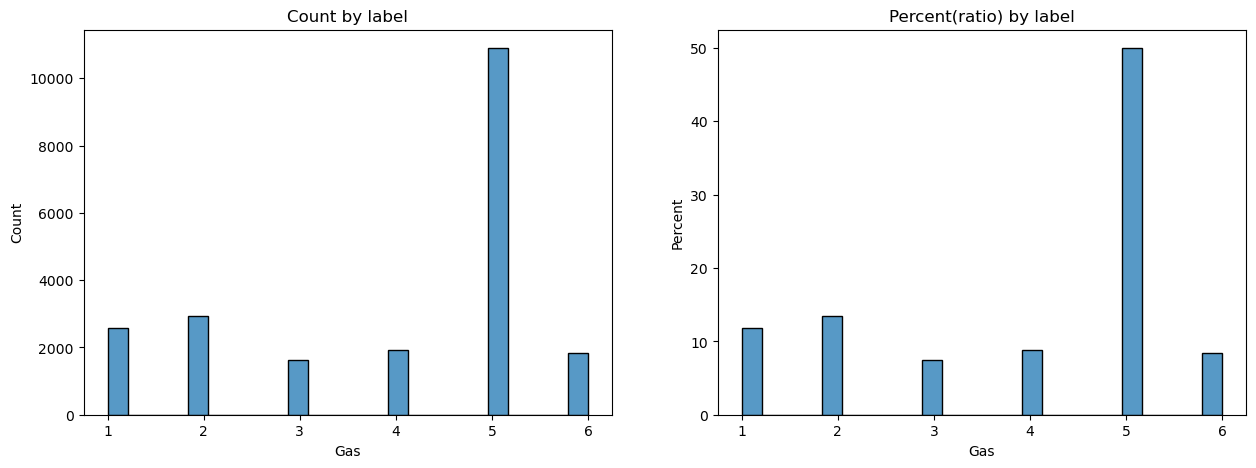

In [24]:
fig = plt.figure(figsize = (15,5))
fig.add_subplot(121)
sns.histplot(data=df, x='Gas')
plt.title("Count by label")

# easy to read as %
fig.add_subplot(122)
sns.histplot(data=df, x='Gas',stat='percent')
plt.title("Percent(ratio) by label")

# Imbalanced issue

#### Approaches to Imbalance Data 
#### Data-Based Approach
    1. Over Sampling : Balance the data by over-sampling Gas classes 1,2,3,4,6.
    2. Under Sampling: Balance the data by under-sampling Gas class 5.
#### ML Algorithm-Based Approach
    3.Using algorithm : Balance the data by adjusting class weights during ML training. 

### 2-3 Indepenedent Varaible Data Explore

In [25]:
df.describe().to_csv('/Users/chulwonchae/MachineLearning_study_summer/data/3.Classification_Gas_component/describe.csv')

<Axes: >

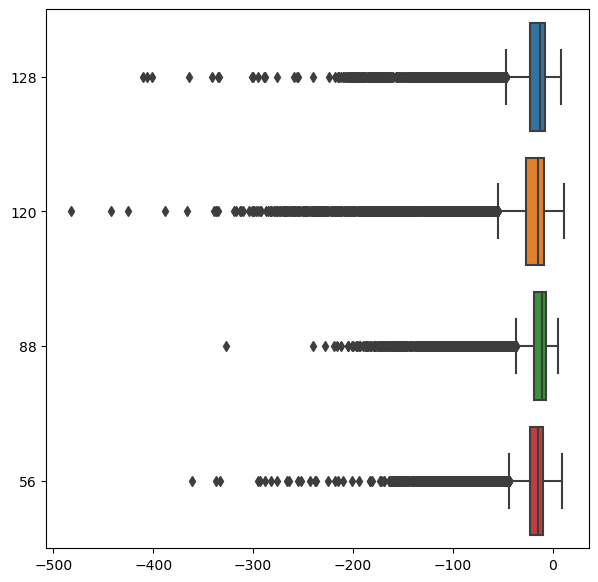

In [28]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df[["128", "120", "88", "56"]],orient='h')

<Axes: >

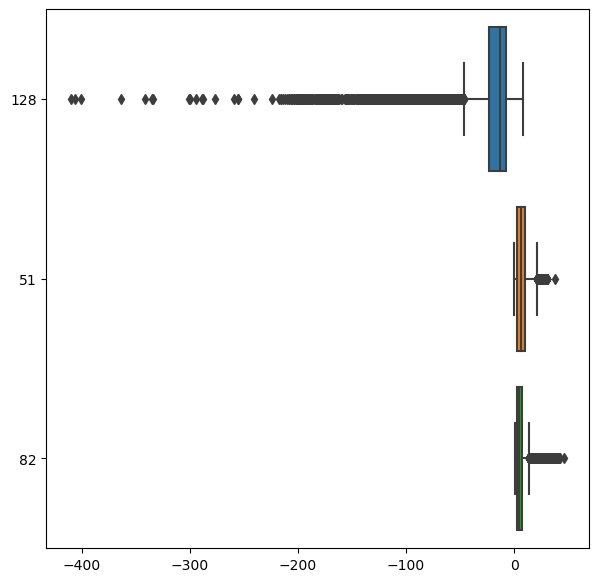

In [29]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df[["128", "51", "82"]], orient="h")

#### Boxplot review

In [31]:
df['128'].describe()

count    21802.000000
mean       -19.268714
std         24.285205
min       -410.152297
25%        -22.954481
50%        -12.919821
75%         -7.245491
max          8.357968
Name: 128, dtype: float64

In [30]:
# IQR
IQR = df['128'].quantile(0.75) - df['128'].quantile(0.25)
max_boxplot = df['128'].quantile(0.75) + 1.5*IQR
min_boxplot = df['128'].quantile(0.25) - 1.5*IQR

print("IQR : ", IQR)
print("IQR maximum : ", max_boxplot)
print("IQR minimum : ", min_boxplot)
# print("# Outlier by IQR : ", len(df[df["128"] < min_boxplot]) )

IQR :  15.708990697254464
IQR maximum :  16.31799532676568
IQR minimum :  -46.51796746225217


In [37]:
IQR*1.5

23.563486045881696

In [39]:
-22.954481 - IQR*1.5

-46.5179670458817

In [40]:
-7.245491 + IQR*1.5
# Since maximum value is 8.357968, this will be the Actual maximum whisker value (Not 16.317)

16.317995045881695

In [38]:
quantiles = df['128'].quantile([0.25, 0.5, 0.75])
print(quantiles)


0.25   -22.954481
0.50   -12.919821
0.75    -7.245491
Name: 128, dtype: float64


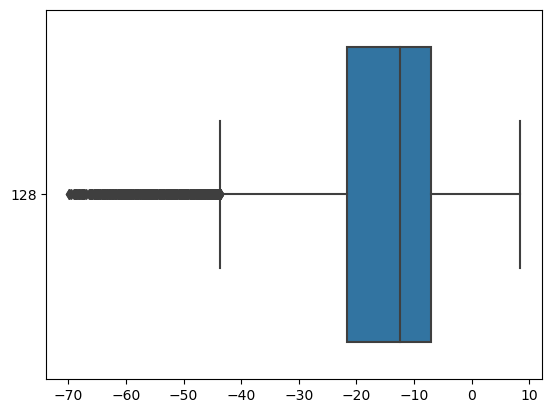

In [36]:
df_filtered = df[df['128'] > -70]

sns.boxplot(data=df_filtered[["128"]], orient="h")
plt.show()

<Axes: >

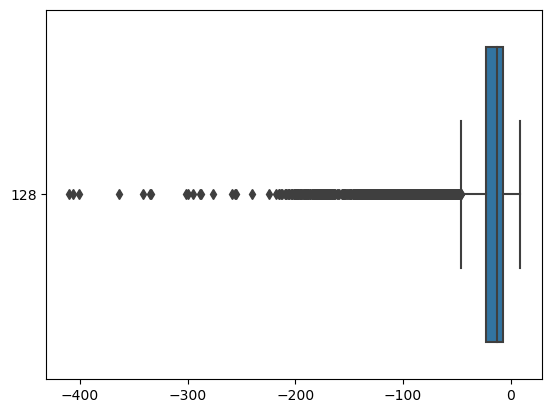

In [41]:
sns.boxplot(data=df[["128"]], orient="h")

<Axes: >

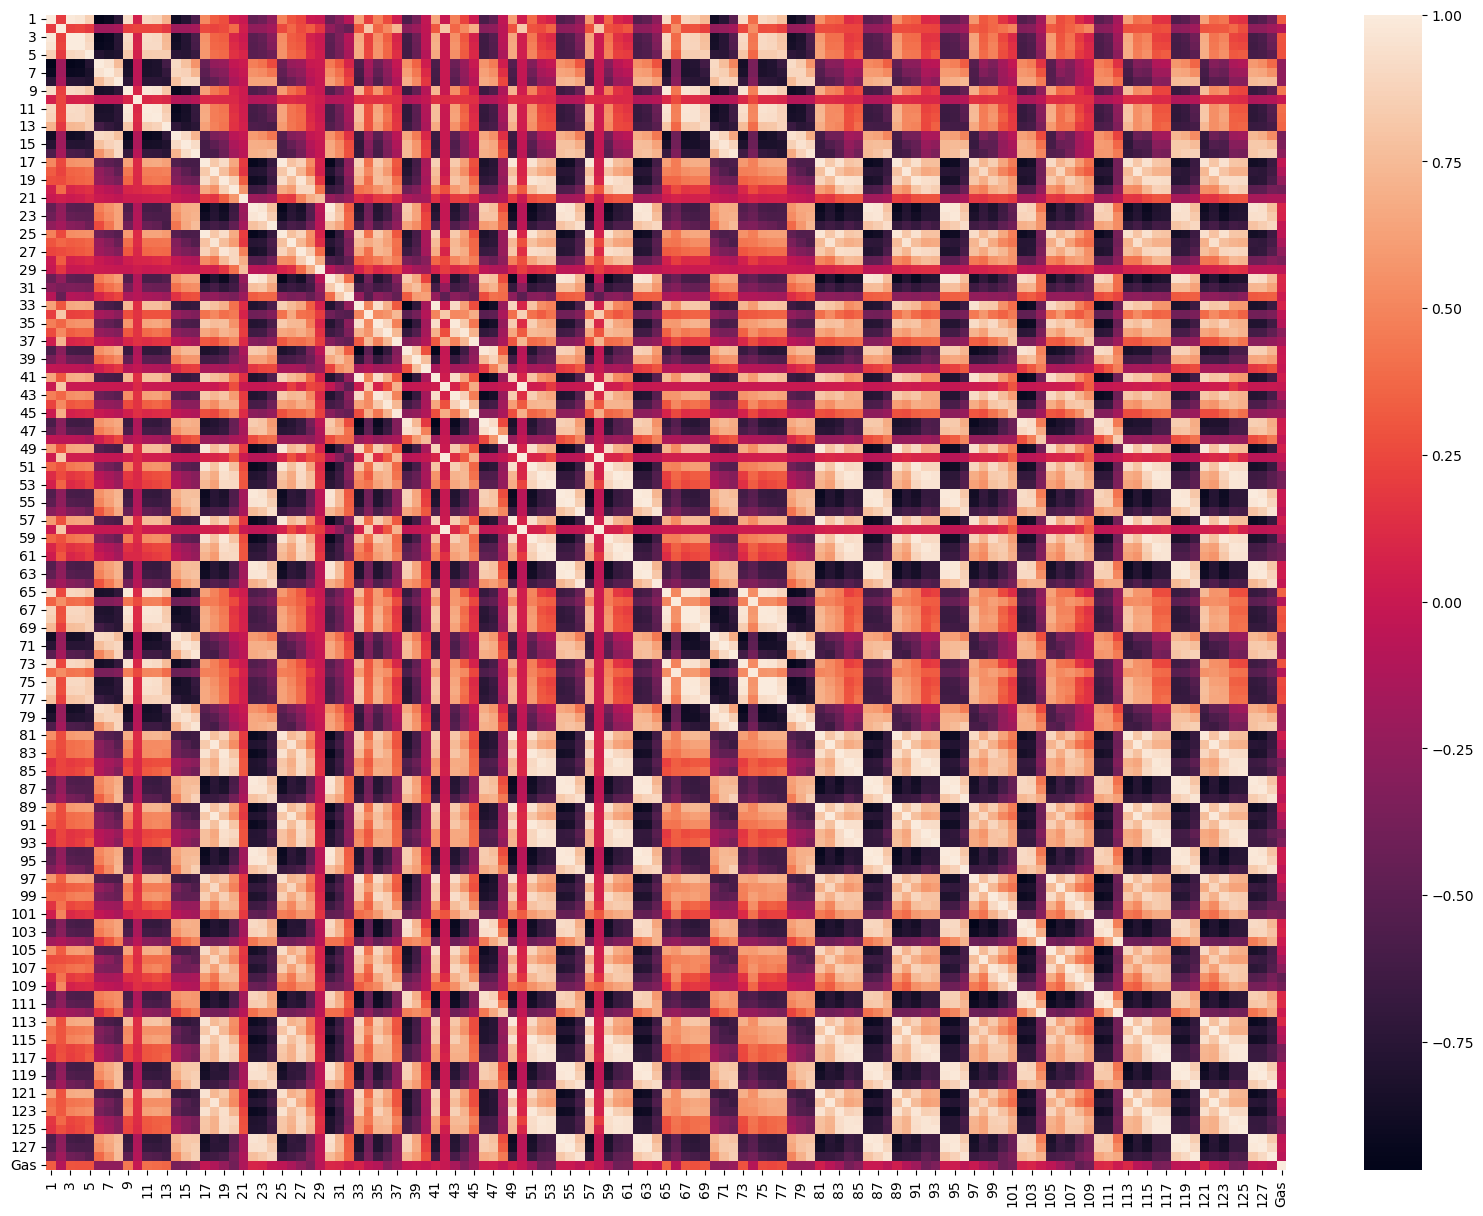

In [42]:
corr_df = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_df)

In [43]:
# check 128 in detail
corr_128 = corr_df.loc[:,"128"].sort_values(ascending=False)
corr_128 = corr_128.iloc[1:]
corr_128

120    0.988547
88     0.963174
56     0.959441
96     0.954216
64     0.921524
         ...   
81    -0.691031
121   -0.700779
123   -0.705649
115   -0.710089
113   -0.711652
Name: 128, Length: 128, dtype: float64

In [45]:
corr_128.head()

120    0.988547
88     0.963174
56     0.959441
96     0.954216
64     0.921524
Name: 128, dtype: float64

In [47]:
corr_128.tail()

81    -0.691031
121   -0.700779
123   -0.705649
115   -0.710089
113   -0.711652
Name: 128, dtype: float64

#### pearsonr correlation

In [49]:
# all of their p-values are 0
# for top10 postive corr
for column_name in list(corr_128.head(10).index):
    statistic, pvalue = stats.pearsonr(df.loc[:,str(column_name)],df.loc[:,str(128)])
    if(pvalue>0.05):
        print("%s %f %f"%(column_name, statistic, pvalue))
print("end")

end


In [50]:
# for top10 negative corr
for column_name in list(corr_128.tail(10).index):
    statistic, pvalue = stats.pearsonr(df.loc[:,str(column_name)], df.loc[:,str(128)])
    if (pvalue >0.05):
        print("%s %f %f"%(column_name, statistic, pvalue))
print("end")

end


/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_5874/2686884650.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title("corr : "+str(corr_128[i]))
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_5874/2686884650.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title("corr : "+str(corr_128[i]))
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_5874/2686884650.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

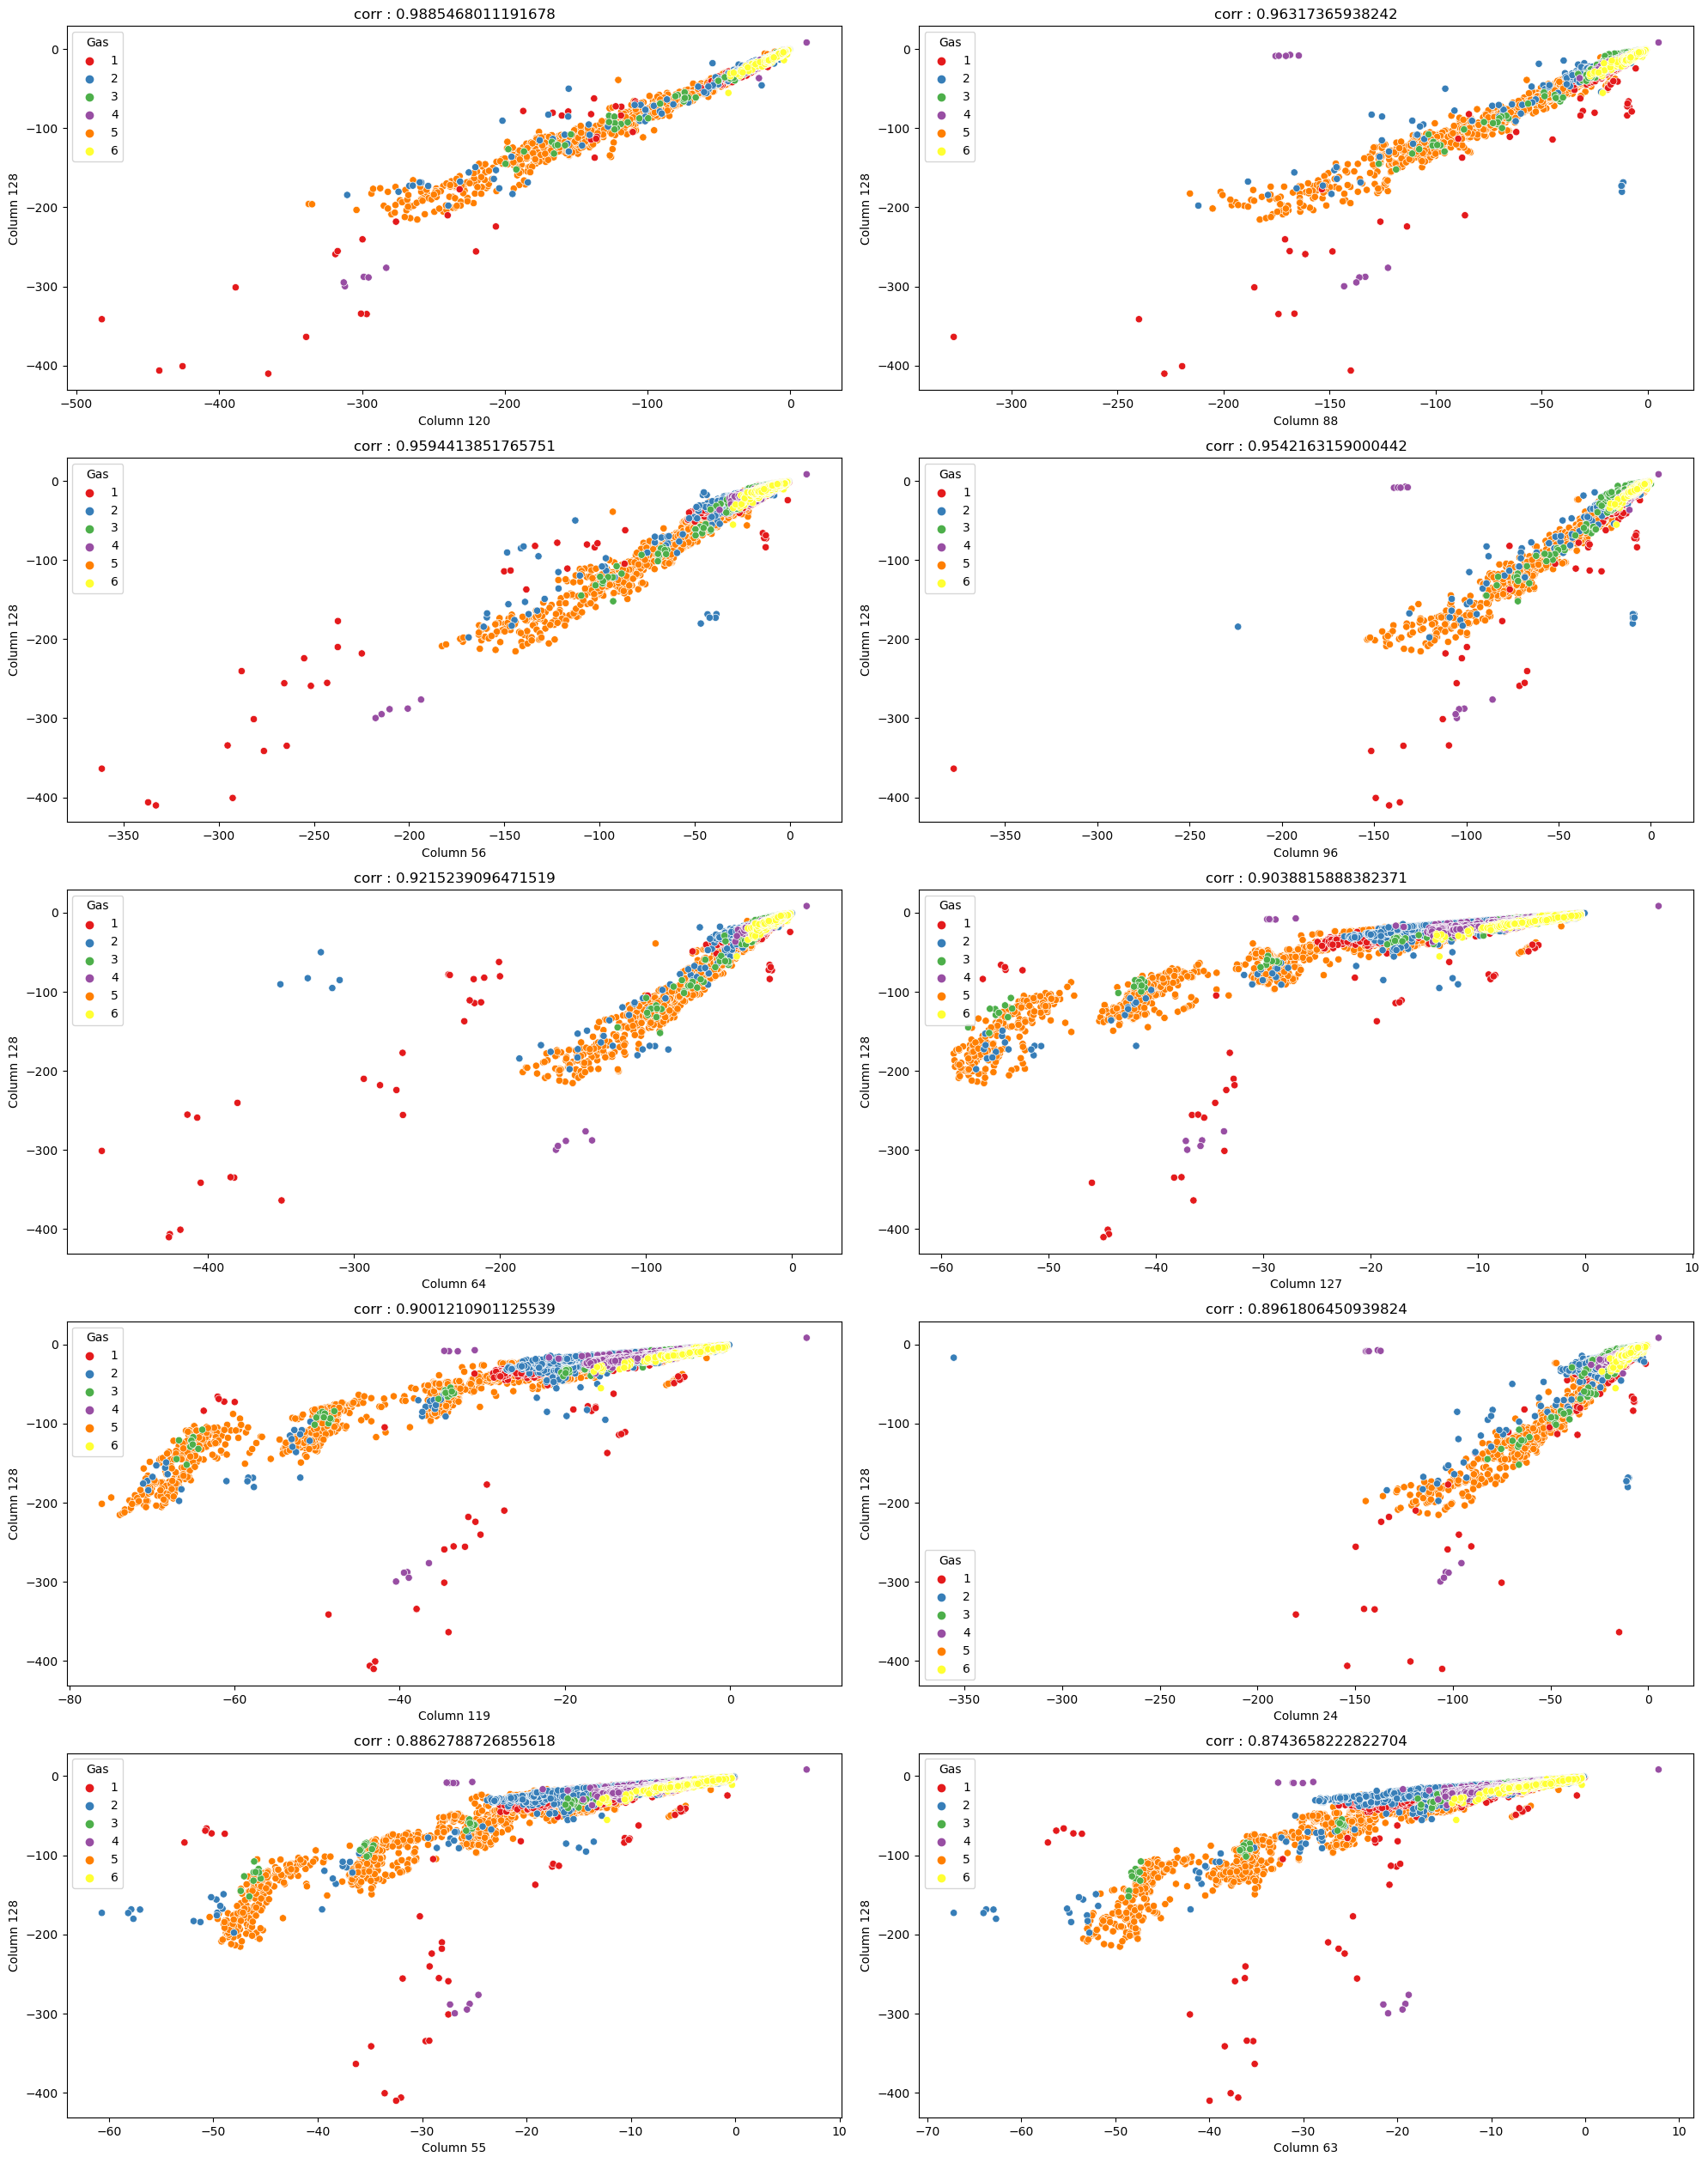

In [51]:
fig = plt.figure(figsize=(20,50))
for i in range(0,10):
    fig.add_subplot(10,2,i+1)
    sns.scatterplot(data=df, x=str(corr_128.index[i]), y="128", hue="Gas", palette= "Set1", legend="full")
    plt.xlabel("Column "+str(corr_128.index[i]))
    plt.ylabel("Column 128")
    plt.title("corr : "+str(corr_128[i]))
    
fig.tight_layout()  
plt.show()

/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_5874/2587497878.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title("corr : "+str(corr_128[i]))
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_5874/2587497878.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title("corr : "+str(corr_128[i]))
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_5874/2587497878.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

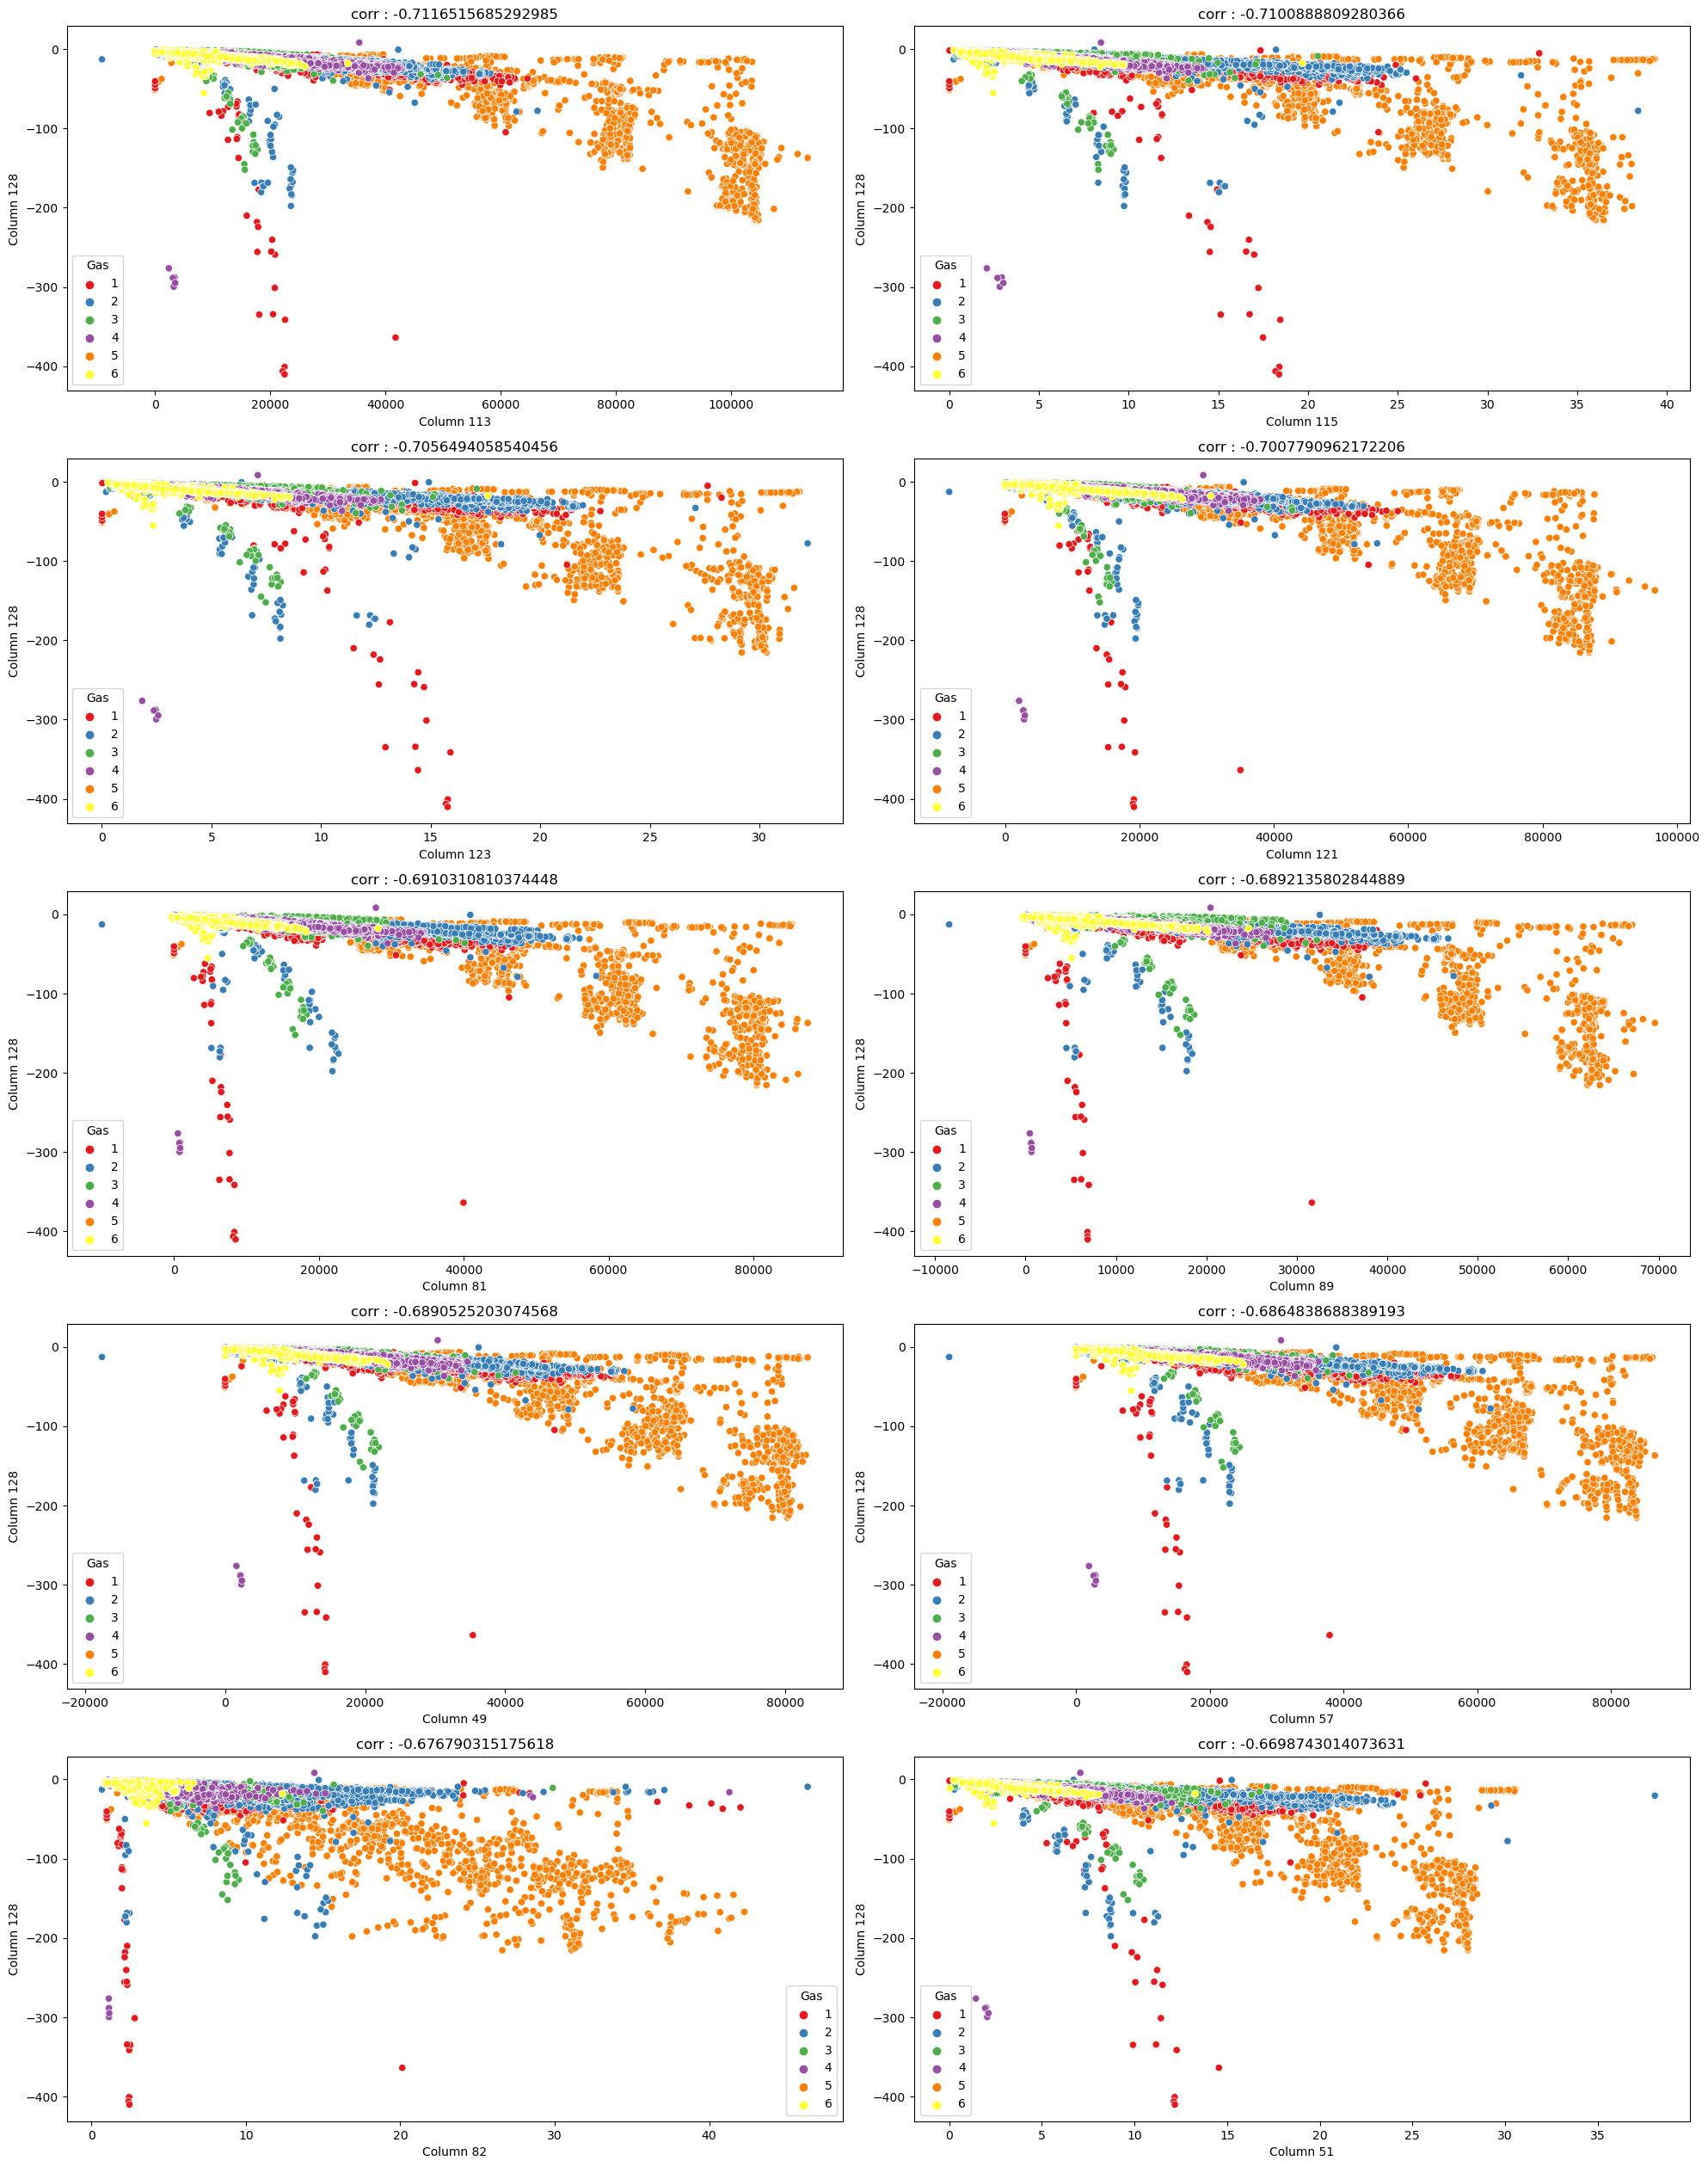

In [52]:
fig = plt.figure(figsize=(20,50))
count = 0
for i in range(-1, -11, -1): # bottom 10
    fig.add_subplot(10,2,count+1)
    sns.scatterplot(data=df, x=str(corr_128.index[i]), y="128", hue="Gas", palette= "Set1", legend="full")
    plt.xlabel("Column "+str(corr_128.index[i]))
    plt.ylabel("Column 128")
    plt.title("corr : "+str(corr_128[i]))
    count = count + 1
fig.tight_layout()    
plt.show()

## 3. Data Processing 2 

### 3-1 Standardization

In [53]:
X = df.drop(['Gas'], axis=1)
Y = df['Gas']

In [56]:
X

1         2          3          4           5          6  \
0      245051.3867  6.416474  65.366640  88.319524  105.418091 -46.358192   
1       59676.9531  2.320079  11.940337  15.342921   21.212215  -9.826378   
2      244500.1953  6.408445  65.394235  88.604260  107.358495 -46.173043   
3      245405.2031  6.396332  65.324828  88.468697  108.123802 -46.070771   
4      245932.9141  6.418066  65.346245  88.820655  103.805399 -46.497829   
...            ...       ...        ...        ...         ...        ...   
21797    3986.9468  1.928991   0.931013   1.464841    4.558120  -0.758115   
21798    1148.7459  1.344594   0.266789   0.628110    3.488174  -0.270417   
21799    3631.3750  1.886648   0.853495   1.324024    4.377756  -0.694729   
21800     174.1167  1.045112   0.111434   0.425380    3.408624  -0.130351   
21801   23486.7910  3.503305   7.901476  14.400651   20.282000  -4.463151   

               7           8            9        10  ...        119  \
0     -68.175038 -306.481949  223313.7812  5.300864  ... -35.237826   
1     -13.907139  -39.679449   57923.5781  2.159965  ...  -2.275393   
2     -71.623668 -321.496925  222101.5703  5.286261  ... -28.712104   
3     -71.186544 -303.240500  223263.8125  5.295768  ... -29.556261   
4     -68.056935 -288.563157  224945.7031  5.323965  ... -28.289542   
...          ...         ...          ...       ...  ...        ...   
21797  -1.221647   -4.888454   42788.8379  2.563479  ...  -5.026520   
21798  -0.643206   -3.710129   26277.8692  2.445767  ...  -2.011706   
21799  -1.200825   -5.069705   40195.0977  2.467485  ...  -4.886836   
21800  -0.415933   -3.159319    6273.5605  1.241807  ...  -0.865012   
21801  -6.715008  -19.461249   24106.2109  3.335383  ...  -1.421744   

              120         121       122        123        124        125  \
0     -120.459018  56932.6113  6.913148  15.540243  19.320850  24.259156   
1       -5.188364   8383.0586  2.004270   1.575809   2.202270   3.255159   
2      -44.112924  56897.7060  6.870780  15.636151  19.566961  26.142821   
3      -50.689482  57682.1289  6.923879  15.697709  19.822191  26.007811   
4      -45.836839  56406.2792  6.895612  15.520323  19.683290  25.876848   
...           ...         ...       ...        ...        ...        ...   
21797  -11.912230  13881.8833  2.719152   4.069847   6.426872   9.875595   
21798   -5.565016   5076.4912  1.712424   1.477765   2.759142   6.437457   
21799  -11.447639  12933.0698  2.596912   3.740674   5.812016   8.592849   
21800   -4.576441   1397.4131  1.181400   0.670194   1.678143   4.599581   
21801   -4.771889   3867.3090  1.804344   1.476697   3.382033   6.888152   

             126        127        128  
0     -15.373858 -30.961903 -39.008691  
1      -1.401549  -2.005170  -3.993584  
2     -15.306133 -24.256546 -44.792395  
3     -15.592852 -24.941506 -42.894842  
4     -15.184254 -24.434748 -39.145385  
...          ...        ...        ...  
21797  -3.059118  -4.899552 -11.906990  
21798  -1.179544  -1.966888  -5.907984  
21799  -2.908967  -4.671406 -10.521929  
21800  -0.444583  -0.856211  -4.033758  
21801  -0.820847  -1.273321  -4.073439  

[21802 rows x 128 columns]

In [57]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [58]:
X_standard

array([[ 1.84569663, -0.01517924,  2.0362348 , ..., -1.94219216,
        -2.35386359, -0.81285827],
       [-0.20597734, -0.3797845 , -0.32987299, ...,  0.86453474,
         0.82096921,  0.62900358],
       [ 1.8395962 , -0.01589387,  2.03745691, ..., -1.92858771,
        -1.61868441, -1.05102125],
       ...,
       [-0.82627461, -0.41836262, -0.82087951, ...,  0.56172791,
         0.52864156,  0.36017757],
       [-0.8645386 , -0.49326469, -0.8537434 , ...,  1.05676798,
         0.94694173,  0.62734928],
       [-0.60652025, -0.27446985, -0.50874332, ...,  0.98118489,
         0.90120955,  0.62571529]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.25, random_state = random_state, stratify=Y) # stratify 클래스 분포별로 트레인/테스트 나눠

### 3-2 UnderSampling
    When performing sampling, it is incorrect to sample from the entire dataset and then split it into training and testing sets. Instead,  I should split the original dataset into training and testing sets first, and then apply sampling only to the training data.

In [65]:
cnn = NearMiss(sampling_strategy="majority", n_neighbors=5)
X_under, y_under = cnn.fit_resample(X_train, y_train)

Preserve the majority class instances that are close to the minority class instances, and remove the majority class instances that are far from the clusters of minority class instances. The number of minority class instances is determined by n_neighbors.

In [66]:
help(NearMiss)

Help on class NearMiss in module imblearn.under_sampling._prototype_selection._nearmiss:

class NearMiss(imblearn.under_sampling.base.BaseUnderSampler)
 |  NearMiss(*, sampling_strategy='auto', version=1, n_neighbors=3, n_neighbors_ver3=3, n_jobs=None)
 |  
 |  Class to perform under-sampling based on NearMiss methods.
 |  
 |  Read more in the :ref:`User Guide <controlled_under_sampling>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict, callable, default='auto'
 |      Sampling information to sample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{us} = N_{m} / N_{rM}` where :math:`N_{m}` is the
 |        number of samples in the minority class and
 |        :math:`N_{rM}` is the number of samples in the majority class
 |        aft

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'After undersampling for target label'}, xlabel='Gas', ylabel='Count'>

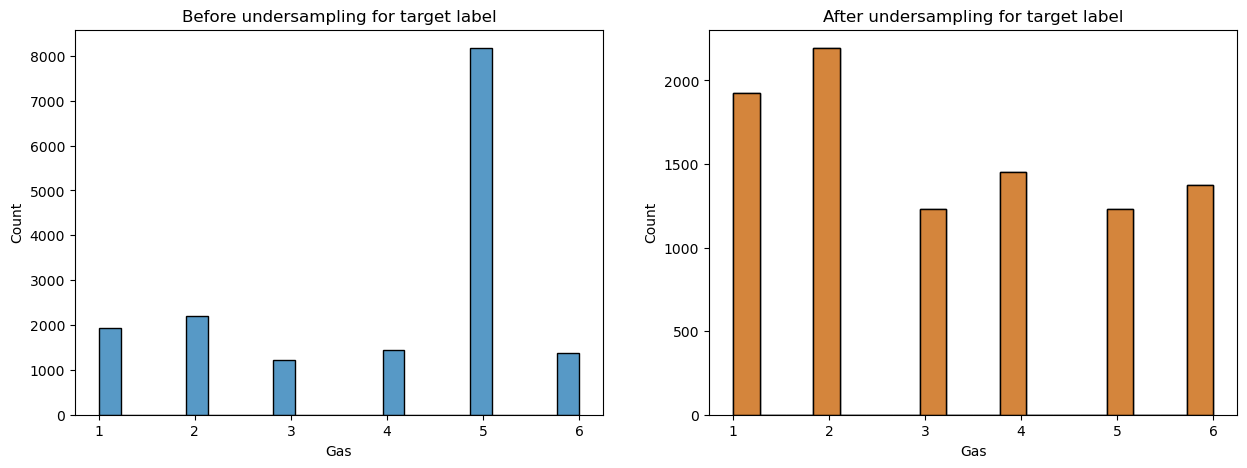

In [67]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before undersampling for target label")

fig.add_subplot(122)
sns.histplot(y_under)
plt.title("After undersampling for target label")
sns.histplot(y_under)

### 3-3 OverSampling
##### SMOTE: Synthetic Minority Over-sampling Technique. A method for creating synthetic samples in the minority class. It generates a set K of nearest minority class instances to a specific minority class instance A using the k-nearest neighbors (KNN) algorithm. Then, it creates new observations between A and the instances in set K.

In [68]:
sm = SMOTE(random_state=123)
X_over, y_over = sm.fit_resample(X_train, y_train)

In [69]:
help(SMOTE)

Help on class SMOTE in module imblearn.over_sampling._smote.base:

class SMOTE(BaseSMOTE)
 |  SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
 |  
 |  Class to perform over-sampling using SMOTE.
 |  
 |  This object is an implementation of SMOTE - Synthetic Minority
 |  Over-sampling Technique as presented in [1]_.
 |  
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, default='auto'
 |      Sampling information to resample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |        number of samples in the minority class after resampling and
 |        :math:`N_{M}` is the number of sampl

/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'After oversampling for target label'}, xlabel='Gas', ylabel='Count'>

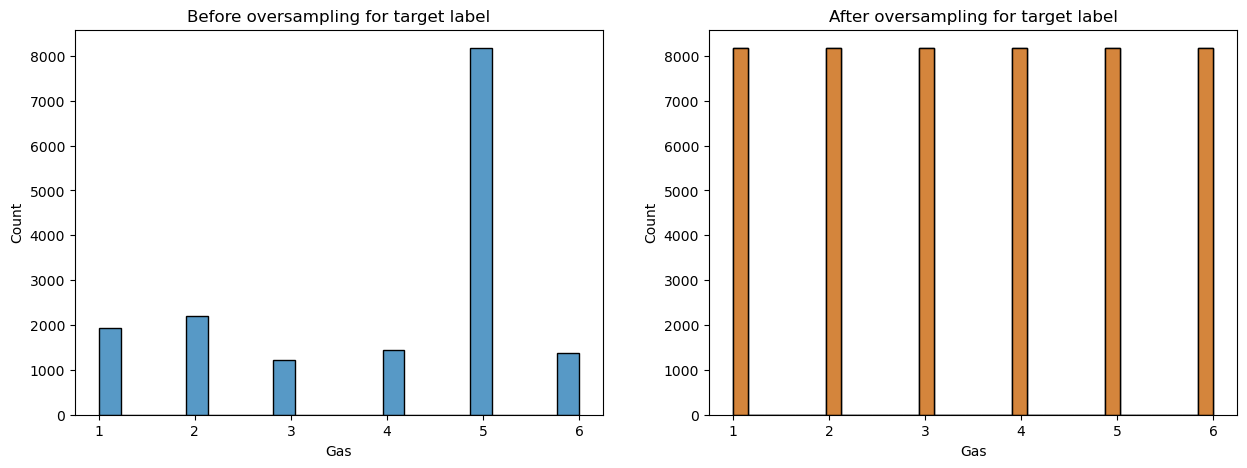

In [70]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.histplot(y_train)
plt.title("Before oversampling for target label")

fig.add_subplot(122)
sns.histplot(y_over)
plt.title("After oversampling for target label")
sns.histplot(y_over)

### 3-4 PCA

#### 3-4 1) UnderSampling PCA

In [71]:
# 2D Reduction
pca = PCA(n_components=2)
X_under_pca_two_dimension = pca.fit_transform(X_under)
df_under_pca_two_dimension = pd.DataFrame(X_under_pca_two_dimension)
df_under_pca_two_dimension["Gas"] = y_under
print("2D Reduction PCA Explainablity : ",sum(pca.explained_variance_ratio_))

# 3D Reduction
pca = PCA(n_components=3)
X_under_pca_three_dimension = pca.fit_transform(X_under)
df_under_pca_three_dimension = pd.DataFrame(X_under_pca_three_dimension)
df_under_pca_three_dimension["Gas"] = y_under
print("3D Reduction PCA Explainablity : ",sum(pca.explained_variance_ratio_))

2D Reduction PCA Explainablity :  0.6653786343389737
3D Reduction PCA Explainablity :  0.732432589457617


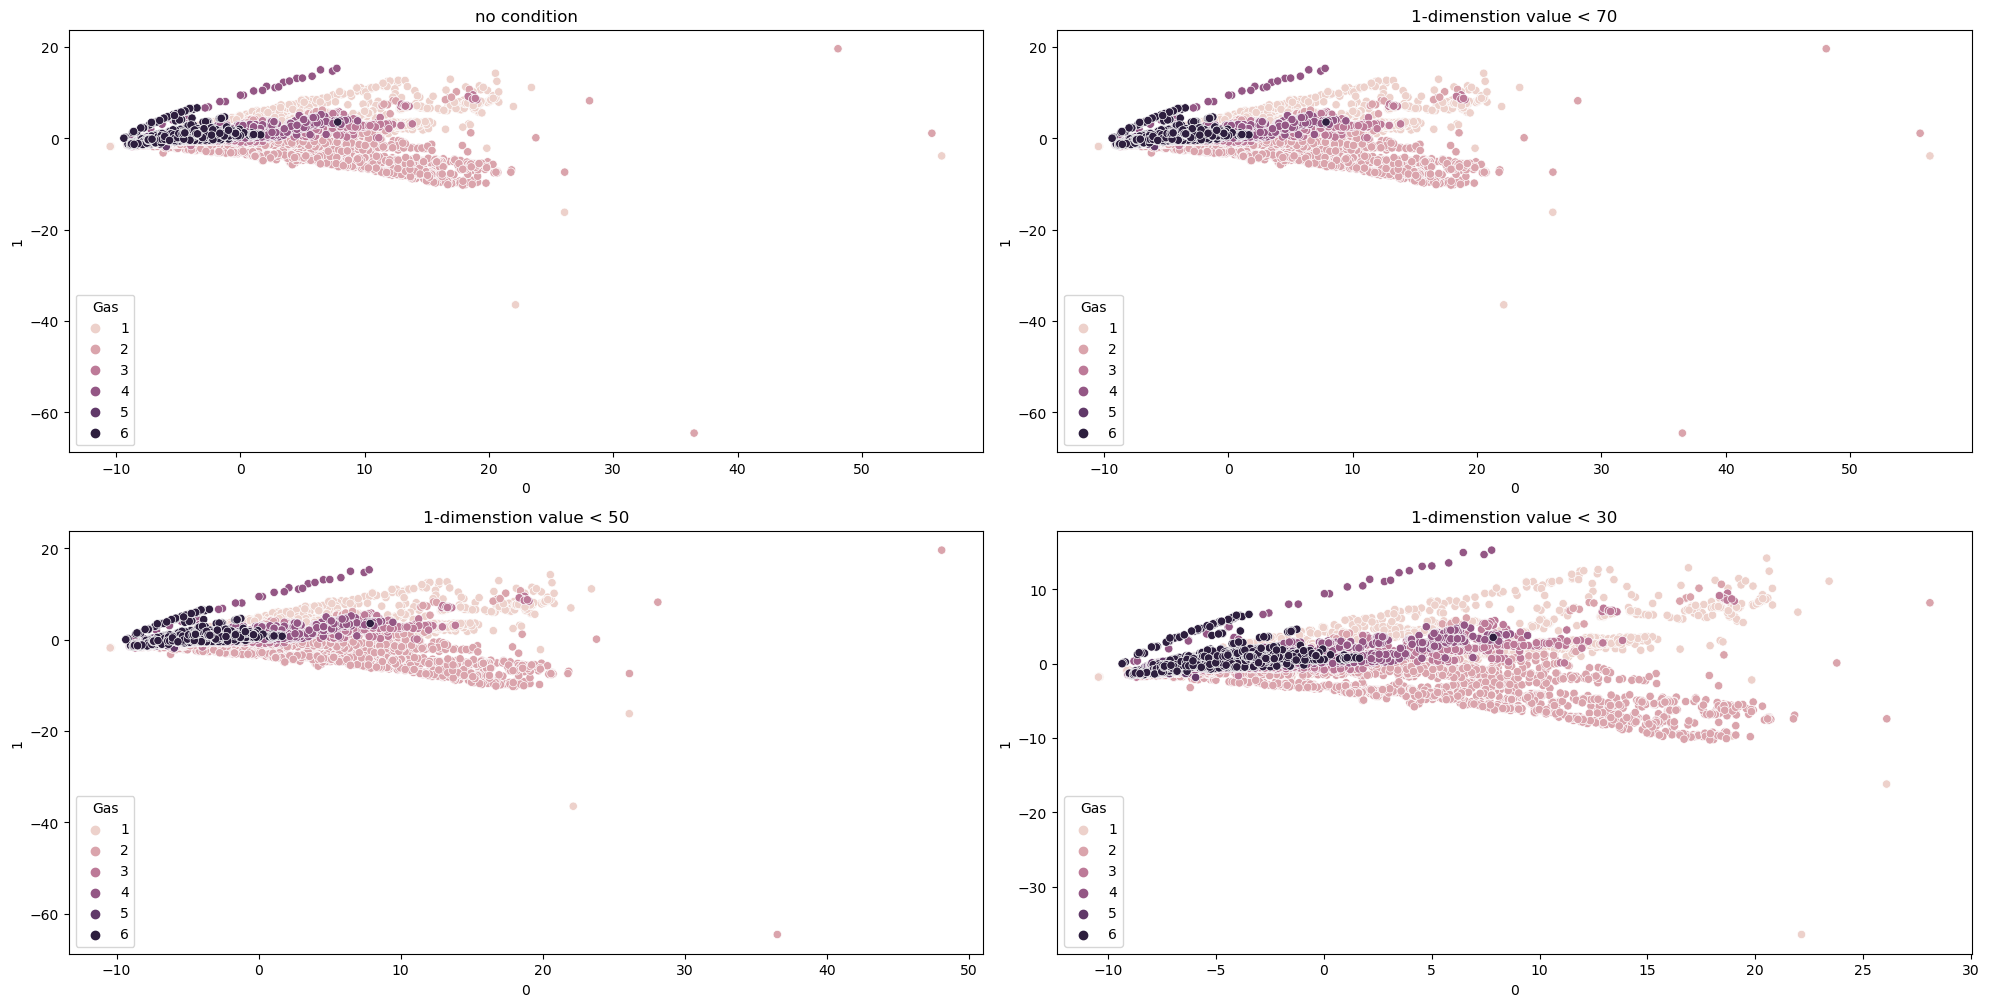

In [72]:
fig = plt.figure(figsize=(20,100))
fig.add_subplot(20,2,1)
sns.scatterplot(data=df_under_pca_two_dimension, x=0, y=1, hue="Gas")
plt.title("no condition")
fig.add_subplot(20,2,2)
sns.scatterplot(data=df_under_pca_two_dimension[df_under_pca_two_dimension[0]<70], x=0, y=1, hue="Gas")
plt.title("1-dimenstion value < 70")
fig.add_subplot(20,2,3)
sns.scatterplot(data=df_under_pca_two_dimension[df_under_pca_two_dimension[0]<50], x=0, y=1, hue="Gas")
plt.title("1-dimenstion value < 50")
fig.add_subplot(20,2,4)
sns.scatterplot(data=df_under_pca_two_dimension[df_under_pca_two_dimension[0]<30], x=0, y=1, hue="Gas")
plt.title("1-dimenstion value < 30")
fig.tight_layout()

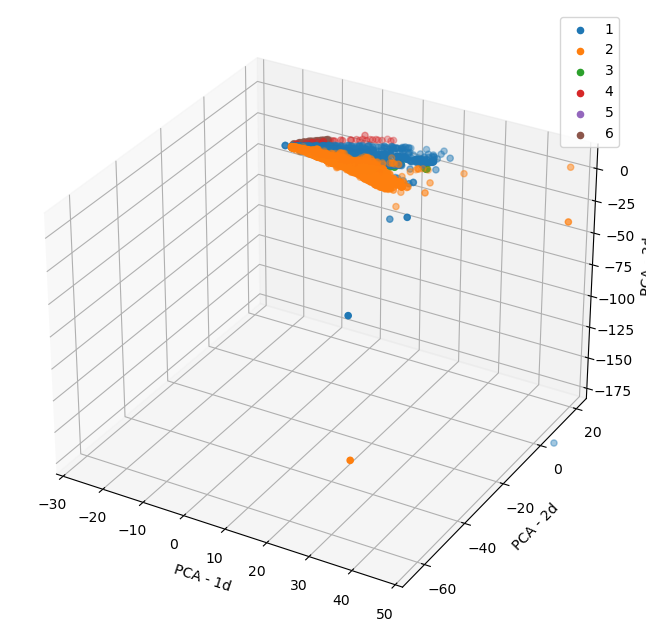

In [73]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')

for i in range(1,7):
    list_index = (df_under_pca_three_dimension["Gas"] == i)
    ax.scatter3D(df_under_pca_three_dimension.loc[list_index,0],df_under_pca_three_dimension.loc[list_index,1],df_under_pca_three_dimension.loc[list_index,2], label=i)
ax.set_xlim([-30,50])
ax.set_xlabel("PCA - 1d")
ax.set_ylabel("PCA - 2d")
ax.set_zlabel("PCA - 3d")
ax.legend(loc="upper right")


In [74]:
list_pca_explained_ratio = []
for i in range(2,30):
    pca_tmp = PCA(n_components=i)
    pca_tmp.fit(X_under)
    list_pca_explained_ratio.append(sum(pca_tmp.explained_variance_ratio_))

In [75]:
list_pca_explained_ratio

[0.6653786343389737,
 0.732432589457617,
 0.789274477035085,
 0.8350125672071073,
 0.8732420599335031,
 0.9040062328683959,
 0.9215157909304253,
 0.9333889517778263,
 0.9427976994557976,
 0.9517079998768988,
 0.9593383705623637,
 0.9655546511023985,
 0.9704729634179405,
 0.9743038188667288,
 0.9776748069328604,
 0.98032261998354,
 0.982536186393686,
 0.9844561246115006,
 0.9860261071688575,
 0.9874590849679887,
 0.9886784979637228,
 0.9898341237677694,
 0.9907758381279416,
 0.9915923327153178,
 0.9923659421958742,
 0.9930225223876205,
 0.9936446562534866,
 0.9942182295719573]

In [76]:
list_pca_explained_ratio[10] # 12 components

0.9593383705623637

#### 3-4 2) OverSampling PCA

In [77]:
# 2D Reductiomn
pca = PCA(n_components=2)
X_over_pca_two_dimension = pca.fit_transform(X_over)
df_over_pca_two_dimension = pd.DataFrame(X_over_pca_two_dimension)
df_over_pca_two_dimension["Gas"] = y_over
print("2D Reductiomn PCA Explainability : ",sum(pca.explained_variance_ratio_))

# 3D Reductiomn
pca = PCA(n_components=3)
X_over_pca_three_dimension = pca.fit_transform(X_over)
df_over_pca_three_dimension = pd.DataFrame(X_over_pca_three_dimension)
df_over_pca_three_dimension["Gas"] = y_over
print("3D Reductiomn PCA Explainability : ",sum(pca.explained_variance_ratio_))

2D Reductiomn PCA Explainability :  0.7300066286270074
3D Reductiomn PCA Explainability :  0.7831623222932207


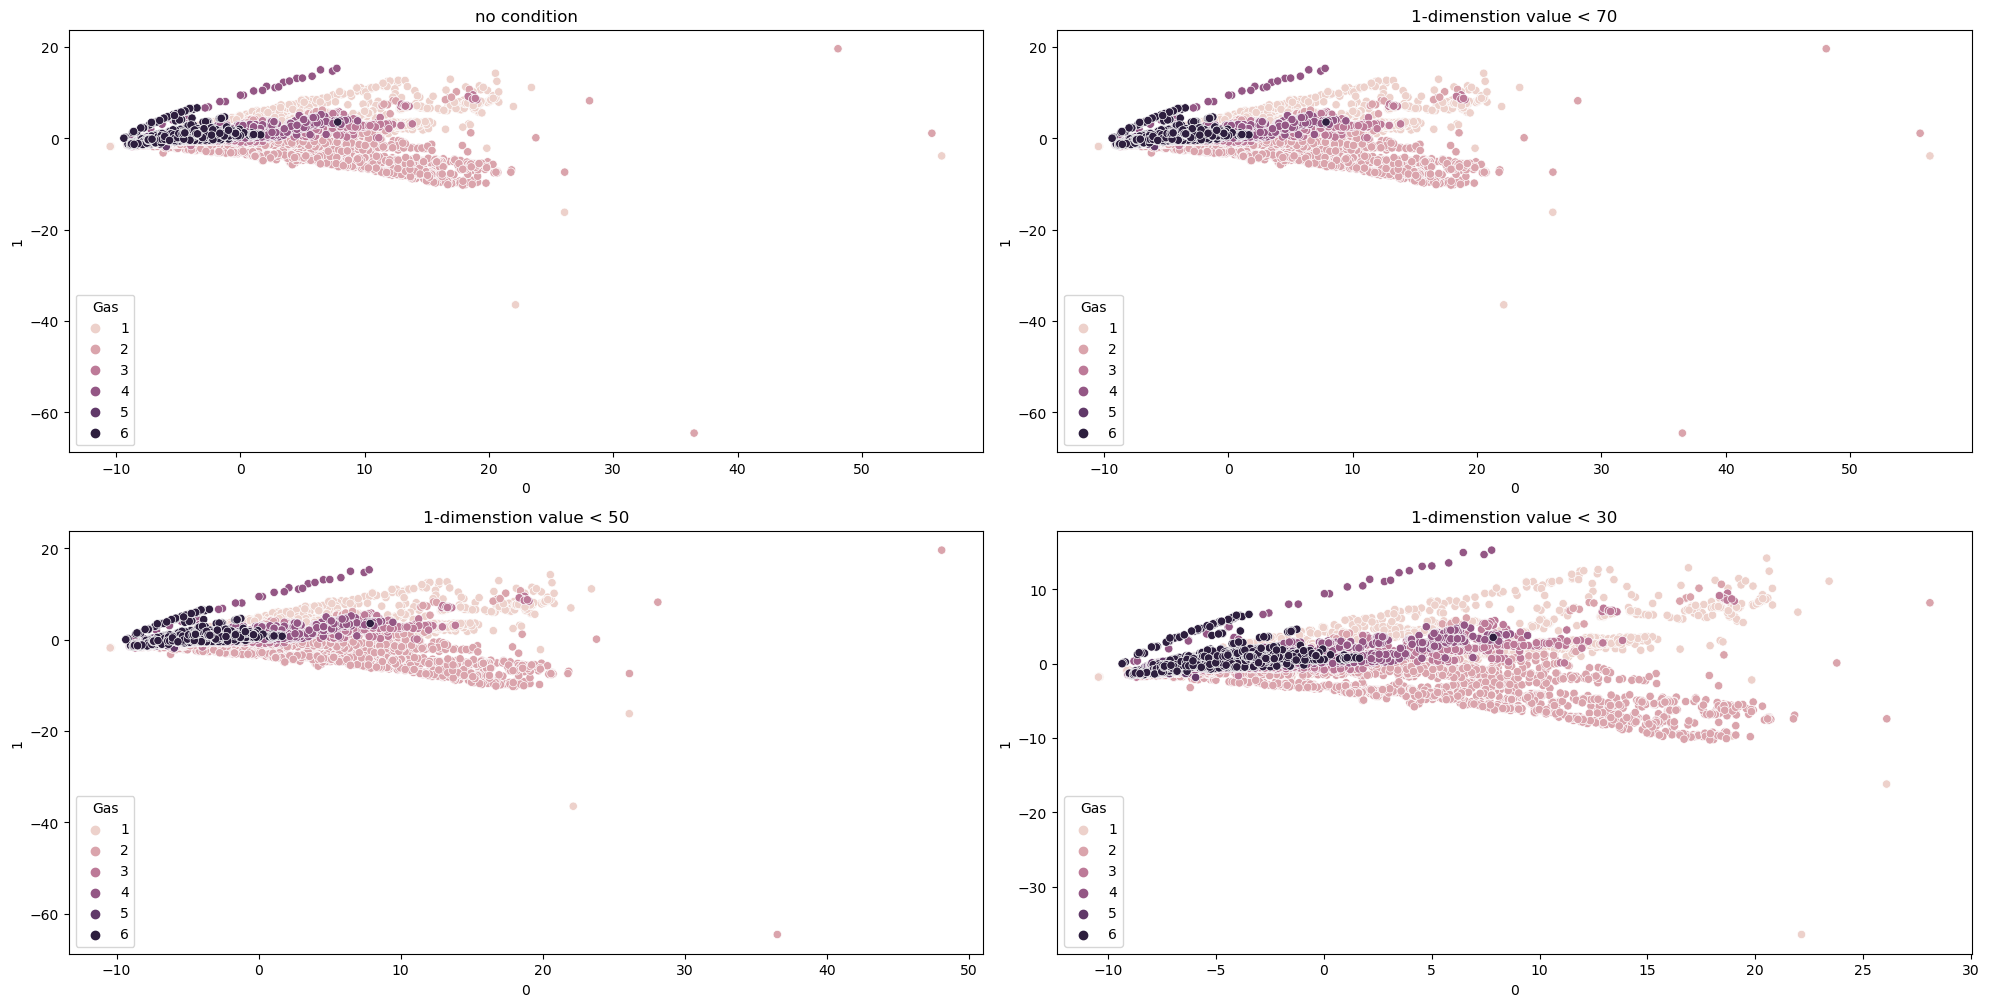

In [78]:
fig = plt.figure(figsize=(20,100))
fig.add_subplot(20,2,1)
sns.scatterplot(data=df_under_pca_two_dimension, x=0, y=1, hue="Gas")
plt.title("no condition")
fig.add_subplot(20,2,2)
sns.scatterplot(data=df_under_pca_two_dimension[df_under_pca_two_dimension[0]<70], x=0, y=1, hue="Gas")
plt.title("1-dimenstion value < 70")
fig.add_subplot(20,2,3)
sns.scatterplot(data=df_under_pca_two_dimension[df_under_pca_two_dimension[0]<50], x=0, y=1, hue="Gas")
plt.title("1-dimenstion value < 50")
fig.add_subplot(20,2,4)
sns.scatterplot(data=df_under_pca_two_dimension[df_under_pca_two_dimension[0]<30], x=0, y=1, hue="Gas")
plt.title("1-dimenstion value < 30")
fig.tight_layout()

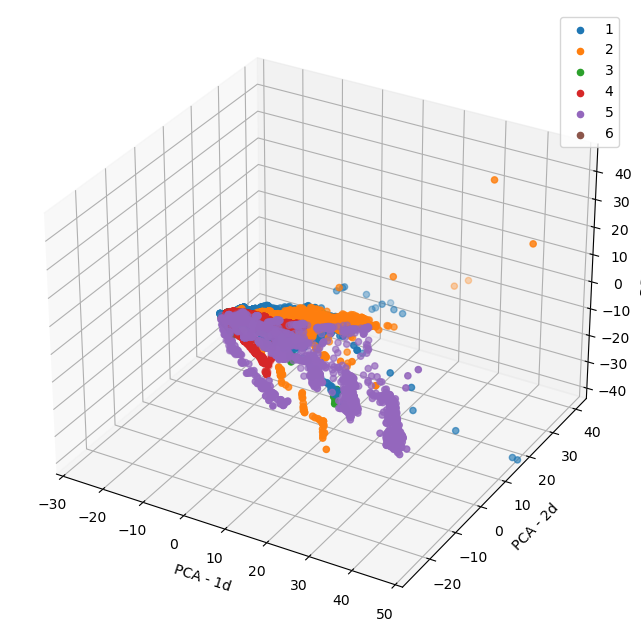

In [79]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')

for i in range(1,7):
    list_index = (df_over_pca_three_dimension["Gas"] == i)
    ax.scatter3D(df_over_pca_three_dimension.loc[list_index,0],df_over_pca_three_dimension.loc[list_index,1],df_over_pca_three_dimension.loc[list_index,2], label=i)
ax.set_xlim([-30,50])
ax.set_xlabel("PCA - 1d")
ax.set_ylabel("PCA - 2d")
ax.set_zlabel("PCA - 3d")
ax.legend(loc="upper right")

In [80]:
list_pca_explained_ratio = []
for i in range(2,30):
    pca_tmp = PCA(n_components=i)
    pca_tmp.fit(X_over)
    list_pca_explained_ratio.append(sum(pca_tmp.explained_variance_ratio_))
list_pca_explained_ratio

[0.7300066286270074,
 0.7831623222932207,
 0.8301892732349154,
 0.8652547669669066,
 0.8934077131879958,
 0.9099397050626093,
 0.9251777932144916,
 0.9385845414107665,
 0.9484180123703457,
 0.9563120347948086,
 0.9615086337877944,
 0.9660443250794759,
 0.9702137422021773,
 0.9738019771261146,
 0.9767105354347341,
 0.9792980318784352,
 0.9817972596303756,
 0.9837899423884706,
 0.9857381319055398,
 0.9875095107681192,
 0.9886998870107379,
 0.9897892180075095,
 0.9907233797200828,
 0.9915911173639386,
 0.9923059658682196,
 0.9929928318065385,
 0.9935982745355103,
 0.9941547346674299]

In [81]:
list_pca_explained_ratio[10] # 12 components

0.9615086337877944

In [82]:
pca = PCA(n_components=12)
pca.fit(X_train)
X_train_base_pca = pca.transform(X_train)
X_test_base_pca = pca.transform(X_test) #Also test set should be transformed

In [83]:
pca = PCA(n_components=12)
pca.fit(X_under)
X_under_pca = pca.transform(X_under)
X_test_under_pca = pca.transform(X_test)

In [84]:
pca = PCA(n_components=12)
pca.fit(X_over)
X_over_pca = pca.transform(X_over)
X_test_over_pca = pca.transform(X_test)

## 4. Model Analysis
#### 1) base model 
#### 2) ML with undersampling (feature' undersampling)
#### 3) ML with oversampling (feature' oversampling)
#### 4) ML with cost-sensitive (model change)

In [85]:
list_model_metric = []

### 4-1. Base Model Learning

In [86]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

In [87]:
from sklearn.model_selection import GridSearchCV

hyper_params = {'n_estimators' : [10, 15],
                'max_depth' : [4],
                'min_samples_leaf' : [4, 6],
                'max_features' : [None]
               }

rf_clf = RandomForestClassifier(random_state = 1234, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = hyper_params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_base_pca, y_train)

print('best model hyper-parameter : ', grid_cv.best_params_)

best model hyper-parameter :  {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 10}


In [88]:
y_prd_proba = grid_cv.predict_proba(X_test_base_pca)
y_prd = grid_cv.predict(X_test_base_pca)

In [89]:
help(roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics._ranking:

roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)     from prediction scores.
    
    Note: this implementation can be used with binary, multiclass and
    multilabel classification, but some restrictions apply (see Parameters).
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
        True labels or binary label indicators. The binary and multiclass cases
        expect labels with shape (n_samples,) while the multilabel case expects
        binary label indicators with shape (n_samples, n_classes).
    
    y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
        Target scores.
    
        * In the binary case, it corresponds to an array 

In [90]:
score = roc_auc_score(y_test, y_prd_proba, multi_class='ovr')
list_model_metric.append(score)
print(score)

0.9602909286309124


### 4-2. ML with Under Sampling

In [91]:
from sklearn.model_selection import GridSearchCV

hyper_params = {'n_estimators' : [10, 15],
                'max_depth' : [4],
                'min_samples_leaf' : [4, 6],
                'max_features' : [None]
               }

rf_clf = RandomForestClassifier(random_state = 1234, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = hyper_params, cv = 3, n_jobs = -1)
grid_cv.fit(X_under_pca, y_under)

print('best model hyper-parameter : ', grid_cv.best_params_)

best model hyper-parameter :  {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 15}


In [92]:
y_prd_proba = grid_cv.predict_proba(X_test_under_pca)
y_prd = grid_cv.predict(X_test_under_pca)

In [93]:
score = roc_auc_score(y_test, y_prd_proba, multi_class='ovr')
list_model_metric.append(score)
print(score)

# multiclass 0,1,2 경우의 수가 0은 맞고 1,2 가 틀리는 경우가 있고 등등 
# 그래서 one vs rest ; ovr
# ex)
# one :0 -> 1
# rest : 1,2 -> 0
# precision/recall : 0.65

# one : 1 -> 1
# rest : 0,2 -> 0
# precision/recall : 0.45

# one :2 -> 1
# rest : 0.1 -> 0
# precision/recall : 0.56


0.8346546258162822


### 4-3. ML with Over Sampling

In [94]:
hyper_params = {'n_estimators' : [10, 15],
                'max_depth' : [4],
                'min_samples_leaf' : [4, 6],
                'max_features' : [None]
               }

rf_clf = RandomForestClassifier(random_state = 1234, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = hyper_params, cv = 3, n_jobs = -1)
grid_cv.fit(X_over_pca, y_over)

print('best model hyper-parameter : ', grid_cv.best_params_)

best model hyper-parameter :  {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 10}


In [95]:
y_prd_proba = grid_cv.predict_proba(X_test_over_pca)
y_prd = grid_cv.predict(X_test_over_pca)

In [96]:
score = roc_auc_score(y_test, y_prd_proba, multi_class='ovr')
list_model_metric.append(score)
print(score)

0.9530304309970861


### 4-4. ML with Class weight 

In [97]:
from sklearn.model_selection import GridSearchCV

hyper_params = {'n_estimators' : [10, 15],
                'max_depth' : [4],
                'min_samples_leaf' : [4, 6],
                'max_features' : [None],
                'class_weight' : ['balanced', 'balanced_subsample'] # sampling with ML
               }

rf_clf = RandomForestClassifier(random_state = 1234, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = hyper_params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_base_pca, y_train)

print('best model hyper-parameter : ', grid_cv.best_params_)

best model hyper-parameter :  {'class_weight': 'balanced', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 6, 'n_estimators': 10}


In [98]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

In [99]:
y_prd_proba = grid_cv.predict_proba(X_test_base_pca)
y_prd = grid_cv.predict(X_test_base_pca)

In [100]:
score = roc_auc_score(y_test, y_prd_proba, multi_class='ovr')
list_model_metric.append(score)
print(score)

0.9290256657933389


In [101]:
list_model_metric = [round(score*100,2) for score in list_model_metric]

In [102]:
list_model_metric

[96.03, 83.47, 95.3, 92.9]

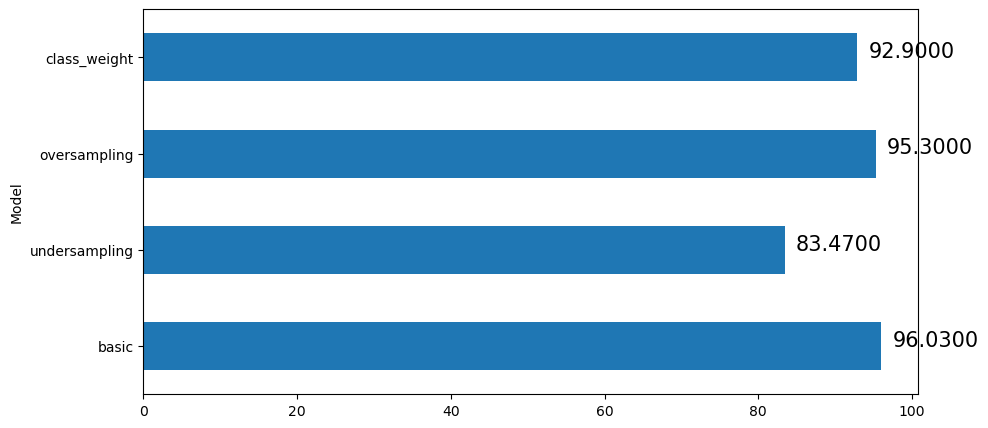

In [103]:
df_metric = pd.DataFrame({'Model':['basic', 'undersampling', 'oversampling', 'class_weight'], 'roc_auc_score':list_model_metric})
ax = df_metric.plot.barh(x='Model', y='roc_auc_score', rot=0, figsize=(10,5), legend=False)
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.4f'),
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                   size=15, xytext=(8, 0),
                   textcoords='offset points')

### 4-5. Model Analysis

In [104]:
rf_clf_params = {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 15}
rf_clf = RandomForestClassifier(**rf_clf_params)
rf_clf.fit(X_train_base_pca, y_train)

RandomForestClassifier(max_depth=4, max_features=None, min_samples_leaf=4,
                       n_estimators=15)

In [105]:
rf_clf.feature_importances_

array([1.91637278e-02, 3.65831707e-01, 9.84365577e-05, 4.05302851e-02,
       2.35738774e-01, 1.06025135e-01, 4.04243800e-03, 0.00000000e+00,
       3.28448816e-03, 8.25594516e-02, 2.31479139e-02, 1.19577642e-01])

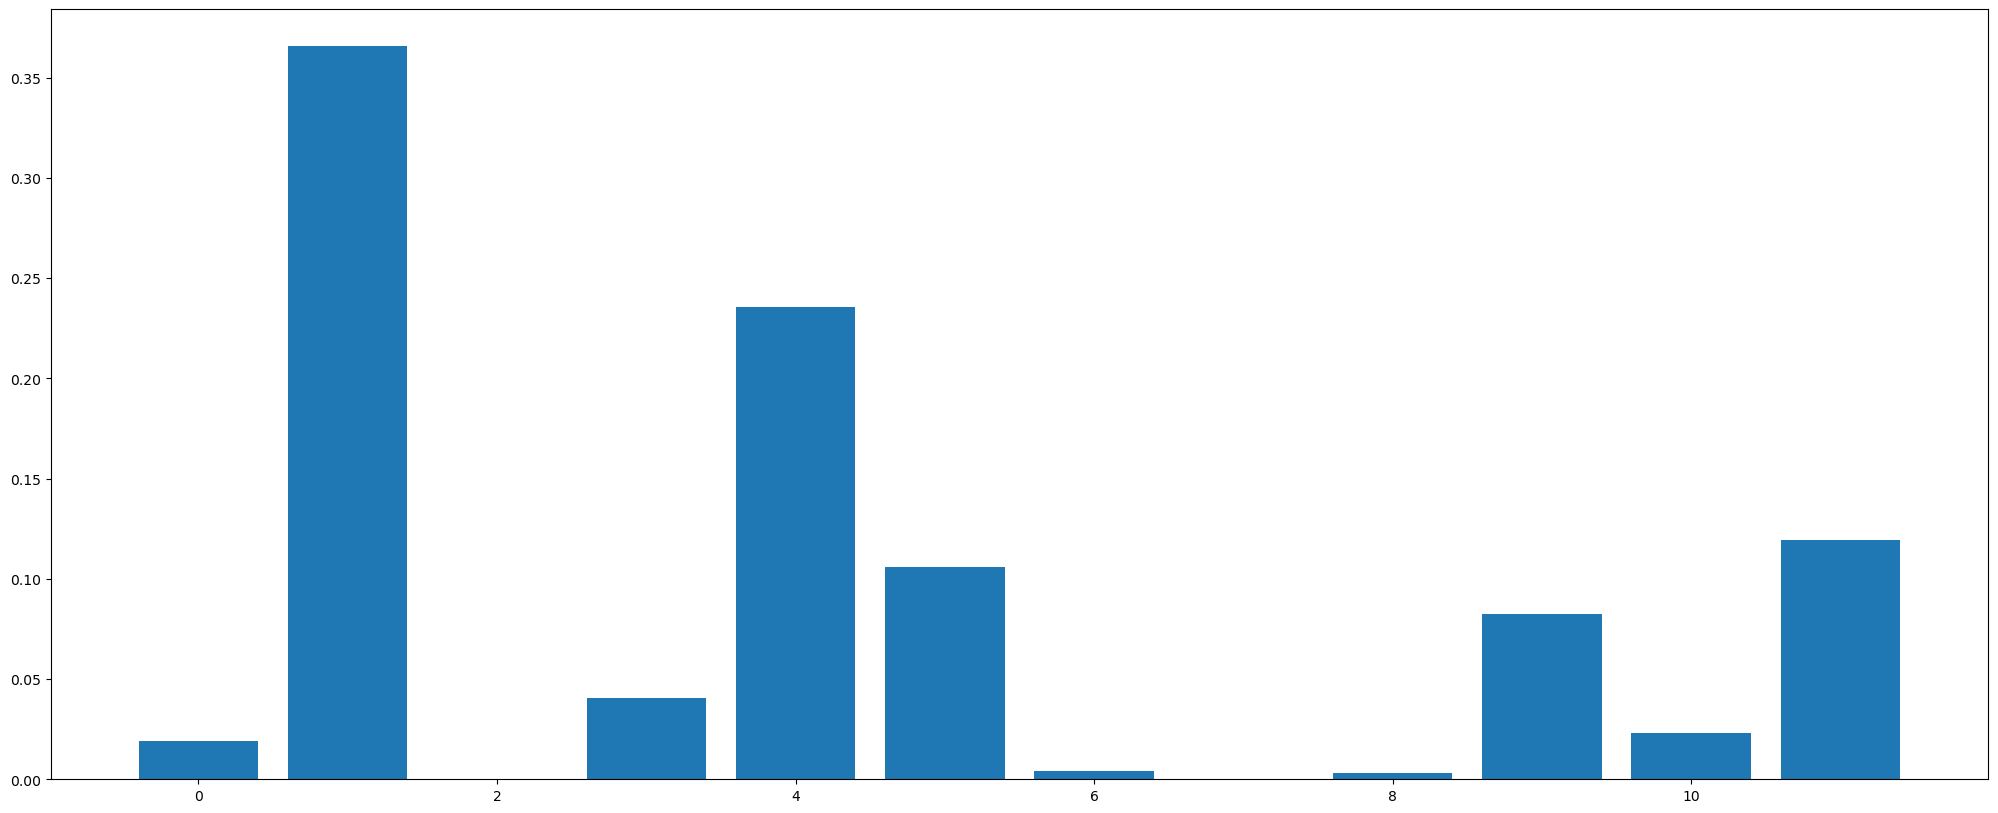

In [106]:
# Cons of using PCA, you can't really explain features
plt.figure(figsize=(25,10))
ax = plt.bar(np.array(range(0,12)),rf_clf.feature_importances_)